# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [149]:
import pandas as pd
import numpy as np
import os
DATA_FOLDER = './Data/' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average* per year of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

# Task 1: Clean code
In this section we are putting some nice and clean explained code. If you want to check out what we did in more detail you can take a look at the [Steps section](#task_1_steps). We'll start by checking what we have for the three countries:

In [150]:
import numpy as np
import pandas as pd

from pandas import IndexSlice as pidx

import glob

csv_files_guinea = glob.glob(DATA_FOLDER+"ebola/guinea_data/*.*")
csv_files_liberia = glob.glob(os.path.join(DATA_FOLDER, "ebola/liberia_data/*.*"))
csv_files_sl = glob.glob(os.path.join(DATA_FOLDER, "ebola/sl_data/*.*"))
frame_guinea = pd.DataFrame()
frame_liberia = pd.DataFrame()
frame_sl = pd.DataFrame()
for csv_file in csv_files_guinea:
    frame_guinea = frame_guinea.append(pd.read_csv(csv_file))

for csv_file in csv_files_liberia:
    frame_liberia = frame_liberia.append(pd.read_csv(csv_file))

for csv_file in csv_files_sl:
    frame_sl = frame_sl.append(pd.read_csv(csv_file))

### Quick note
We did the exercise and then we realized we forgot to construct a single dataframe for all three countries before doing the operations. So we constructed the initial dataframe at the [end of the exercise](#constructing_dataframe) to show how to do it. Once we have constructed it the operations are similar as we did for each country separately.

## Liberia
Let's start by looking at the Liberia frame:

In [151]:
frame_liberia.head(50)

,Bomi County,Bong County,Date,Gbarpolu County,Grand Bassa,Grand Cape Mount,Grand Gedeh,Grand Kru,Lofa County,Margibi County,Maryland County,Montserrado County,National,Nimba County,River Gee County,RiverCess County,Sinoe County,Unnamed: 18,Variable
0,NaN,NaN,6/16/2014,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,Specimens collected
1,NaN,NaN,6/16/2014,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Specimens pending for testing
2,NaN,NaN,6/16/2014,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,7.0,28.0,NaN,NaN,NaN,NaN,NaN,Total specimens tested
3,NaN,NaN,6/16/2014,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN,NaN,Newly reported deaths
4,NaN,NaN,6/16/2014,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,0.0,8.0,NaN,NaN,NaN,NaN,NaN,Total death/s in confirmed cases
5,NaN,NaN,6/16/2014,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,0.0,6.0,NaN,NaN,NaN,NaN,NaN,Total death/s in probable cases
6,NaN,NaN,6/16/2014,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN,NaN,Total death/s in suspected cases
7,NaN,NaN,6/16/2014,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,0.0,16.0,NaN,NaN,NaN,NaN,NaN,"Total death/s in confirmed, probable, suspecte..."
8,NaN,NaN,6/16/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Case Fatality Rate (CFR) - Confirmed & Probabl...
9,NaN,NaN,6/16/2014,NaN,NaN,NaN,NaN,NaN,41.0,NaN,NaN,0.0,41.0,NaN,NaN,NaN,NaN,NaN,Newly reported contacts


Here, by looking at the various data, we can see that we have the "Total death/s in confirmed, probable, suspected cases" field which is the one we are looking for. We also have the "Total death/s in suspected cases", "Total death/s in probable cases" and "Total death/s in confirmed cases" that we could take separately and add up but, in this case, it is easier to simply take the Total. Just by looking at the dataset the total seems right and there should be no mistake if it was generated computationally. But it could be a good idea to sum up the three values for all dates and just to check if it is always good. For now we will simply assume the total is good. As for the new cases we don't have the total. We only have the three columns "New Case/s (Suspected)", "New Case/s (Probable)" and "New case/s (confirmed)". We will simply add them up

In [152]:
total_deaths_string = 'Total death/s in confirmed, probable, suspected cases'
new_cases_suspected = "New Case/s (Suspected)"
new_cases_probable = "New Case/s (Probable)"
new_cases_confirmed = "New case/s (confirmed)"

One very important thing before starting: we must tell pandas that the Date field is a date and not a string 

In [153]:
frame_liberia.Date = pd.to_datetime(frame_liberia.Date)

Now, let's do some useful preprocessing. First we have to set the index and also replace NaN values by zero. And we also have to sort them by index:

In [154]:
frame_liberia = frame_liberia.set_index(['Date', 'Variable']).fillna(0).sort_index()

Now let's check if everything went correctly:

In [155]:
frame_liberia.head(50)

Let's also have a look at the tail:

In [156]:
frame_liberia.tail(50)

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>Bomi County</th>
      <th>Bong County</th>
      <th>Gbarpolu County</th>
      <th>Grand Bassa</th>
      <th>Grand Cape Mount</th>
      <th>Grand Gedeh</th>
      <th>Grand Kru</th>
      <th>Lofa County</th>
      <th>Margibi County</th>
      <th>Maryland County</th>
      <th>Montserrado County</th>
      <th>National</th>
      <th>Nimba County</th>
      <th>River Gee County</th>
      <th>RiverCess County</th>
      <th>Sinoe County</th>
      <th>Unnamed: 18</th>
    </tr>
    <tr>
      <th>Date</th>
      <th>Variable</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="18" valign="top">2014-12-08</th>
      <th>Newly Reported deaths in HCW</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>Newly reported contacts</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>Newly reported deaths</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>Specimens collected</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>Specimens pending for testing</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>Total Number of Confirmed Cases \r\n of Guinean Nationality</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>Total Number of Confirmed Cases \r\n of Sierra Leonean Nationality</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr

Everything seems fine ! By looking at the DATA folder we see that dates go from june to december. So let's prepare some tools for slicing the frame:

In [157]:
month_starts = pd.date_range(start="6/1/2014", end="12/9/2014", freq="MS")
month_ends = pd.date_range(start="6/1/2014", end="12/31/2014", freq="M")
month_starts = [str(entry.date()) for entry in month_starts]
month_ends = [str(entry.date()) for entry in month_ends]
months = [slice(month_start, month_end) for (month_start, month_end) in zip(month_starts, month_ends)]

Quick check to see if everything is fine:

In [158]:
months

[slice('2014-06-01', '2014-06-30', None),
 slice('2014-07-01', '2014-07-31', None),
 slice('2014-08-01', '2014-08-31', None),
 slice('2014-09-01', '2014-09-30', None),
 slice('2014-10-01', '2014-10-31', None),
 slice('2014-11-01', '2014-11-30', None),
 slice('2014-12-01', '2014-12-31', None)]

Excellent ! Now we have our slices. Before doing the rest, we have a very important remark to do because the dataset is not clean. Indeed, among the 100 availables dates, 24 have the total death as the 'Total death/s in confirmed, \r\n probable, suspected cases' string (if it does not work, try putting \n instead of \r\n. It seems different OSs read the csv data differently - \r\n on Windows 10 and \n on Ubuntu): 

In [159]:
selection = frame_liberia.loc[(pidx[slice('2014-06-01', '2014-12-31', None), 'Total death/s in confirmed, \n probable, suspected cases']), :]
selection.shape

KeyError: 'Total death/s in confirmed, \n probable, suspected cases'

And 76 have the string 'Total death/s in confirmed, probable, suspected cases' without the '\n':

In [160]:
selection = frame_liberia.loc[(pidx[slice('2014-06-01', '2014-12-30', None), 'Total death/s in confirmed, probable, suspected cases']), :]
selection.shape

(76, 17)

This is really cumbersome, but we have multiple ways of dealing with this. We can take the dataframe and set the values accordingly. Or we can simply research with the two strings (we will choose this method because it is more "light weight":

In [161]:
selection = frame_liberia.loc[(pidx[slice('2014-06-01', '2014-12-30', None), ['Total death/s in confirmed, probable, suspected cases', 'Total death/s in confirmed, \n probable, suspected cases', 'Total death/s in confirmed, \r\n probable, suspected cases']]), :]
selection.shape

(100, 17)

So let us change our string to a list:

In [162]:
total_deaths_string = ['Total death/s in confirmed, probable, suspected cases', 'Total death/s in confirmed, \n probable, suspected cases', 'Total death/s in confirmed, \r\n probable, suspected cases']

Now we have to make sure everything is fine for the other values (suspected, probable and confirmed new cases):

In [163]:
selection = frame_liberia.loc[(pidx[slice('2014-06-01', '2014-12-30', None), new_cases_confirmed]), :]
print("Confirmed: " + str(selection.shape))
selection = frame_liberia.loc[(pidx[slice('2014-06-01', '2014-12-30', None), new_cases_probable]), :]
print("Probable: " + str(selection.shape))
selection = frame_liberia.loc[(pidx[slice('2014-06-01', '2014-12-30', None), new_cases_suspected]), :]
print("Suspected: " + str(selection.shape))

Confirmed: (100, 17)
Probable: (100, 17)
Suspected: (100, 17)


It is 100 for each of them so we don't have the same problem! Now we want to take a closer look at the data. Let's take only the deaths for now:

In [164]:
selection = frame_liberia.loc[(pidx[slice('2014-06-01', '2014-12-31', None), total_deaths_string]), :]
selection

,,Bomi County,Bong County,Gbarpolu County,Grand Bassa,Grand Cape Mount,Grand Gedeh,Grand Kru,Lofa County,Margibi County,Maryland County,Montserrado County,National,Nimba County,River Gee County,RiverCess County,Sinoe County,Unnamed: 18
Date,Variable,,,,,,,,,,,,,,,,,
2014-06-16,"Total death/s in confirmed, probable, suspected cases",0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0
2014-06-17,"Total death/s in confirmed, probable, suspected cases",0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,8.0,16.0,0.0,0.0,0.0,0.0,0.0
2014-06-22,"Total death/s in confirmed, probable, suspected cases",0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,11.0,25.0,0.0,0.0,0.0,0.0,0.0
2014-06-24,"Total death/s in confirmed, probable, suspected cases",0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,15.0,32.0,0.0,0.0,0.0,0.0,0.0
2014-06-25,"Total death/s in confirmed, probable, suspected cases",0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,18.0,37.0,0.0,0.0,0.0,0.0,0.0
2014-06-28,"Total death/s in confirmed, probable, suspected cases",0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,2.0,0.0,20.0,49.0,0.0,0.0,0.0,0.0,0.0
2014-06-29,"Total death/s in confirmed, probable, suspected cases",0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,2.0,0.0,20.0,49.0,0.0,0.0,0.0,0.0,0.0
2014-07-01,"Total death/s in confirmed, probable, suspected cases",0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,2.0,0.0,27.0,61.0,0.0,0.0,0.0,0.0,0.0
2014-07-02,"Total death/s in confirmed, probable, suspected cases",0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,2.0,0.0,29.0,66.0,0.0,0.0,0.0,0.0,0.0


We can notice that we have the "National" column which is simply the addition of all the other ones. However, there are probably some errors in the dataset. For example, if we look at the first row we see that the National is 16 but it should be 8. We will assume the National value is correct and it is the one we will use:

In [165]:
selection_national = selection["National"]
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(selection_national)

Date        Variable                                                  
2014-06-16  Total death/s in confirmed, probable, suspected cases           16.0
2014-06-17  Total death/s in confirmed, probable, suspected cases           16.0
2014-06-22  Total death/s in confirmed, probable, suspected cases           25.0
2014-06-24  Total death/s in confirmed, probable, suspected cases           32.0
2014-06-25  Total death/s in confirmed, probable, suspected cases           37.0
2014-06-28  Total death/s in confirmed, probable, suspected cases           49.0
2014-06-29  Total death/s in confirmed, probable, suspected cases           49.0
2014-07-01  Total death/s in confirmed, probable, suspected cases           61.0
2014-07-02  Total death/s in confirmed, probable, suspected cases           66.0
2014-07-03  Total death/s in confirmed, probable, suspected cases           70.0
2014-07-07  Total death/s in confirmed, probable, suspected cases           78.0
2014-07-08  Total death/s in confirmed

Now we can see that the deaths are cumulative. So we can use substractions to approximate the total number of deaths in the month. However, there are some values which are clearly wrong. For example, at date 2014-10-11 we get 0 but it should be between between 2414 and 2451. One solution might be to "interpolate" the neighbor values. But since we will luckily use only the beginning and the end of the month we don't need to bother with that (there are no outliers if we look at the first date or the last date in a month)! Now we want to count the number of deaths. We have several ways of doing that since our calculations will only be approximations (we don't have all the data for each day so we cannot compute precisely). We will do it simply: we take the value at the last known date in the month and substract the value at the last known date in the previous month from it. 

We could also have used interpolation in order to try to guess more precisely what the value at the beginning or the end of the month is but it takes more time and it is not guaranteed that it is much more precise.

Since the total is only 16 at june 16th we will 0 as our initial total:

In [276]:
total_deaths_counter = 0

Also, the data ends on 2014-12-09 so we can assume the last month has only 9 days. So let's already construct our "number of days per month table":

In [167]:
nb_days_month = [30, 31, 31, 30, 31, 30, 9]

In [168]:
avg_daily_deaths = pd.DataFrame(columns=["Month", "Liberia: Avg daily deaths"])
for i, month in enumerate(months):
    
    selection_month = selection_national.loc[(pidx[month]), :]
    value_end_month = selection_month.iloc[selection_month.shape[0] - 1]
    avg_daily_death = (value_end_month - total_deaths_counter) / nb_days_month[i]
    total_deaths_counter = value_end_month
    avg_daily_deaths.loc[i] = [pd.to_datetime(month.start).month, avg_daily_death]
avg_daily_deaths

,Month,Liberia: Avg daily deaths
0,6.0,1.633333
1,7.0,3.096774
2,8.0,23.870968
3,9.0,39.100000
4,10.0,20.612903
5,11.0,15.333333
6,12.0,14.777778


We see that the values culminate in september and go down after that. 

Now we want to look at the daily number of new cases: 

In [169]:
selection_new_cases = frame_liberia.loc[(pidx[slice('2014-06-01', '2014-12-31', None), [new_cases_confirmed, new_cases_probable, new_cases_suspected]]), :]
selection_new_cases

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>Bomi County</th>
      <th>Bong County</th>
      <th>Gbarpolu County</th>
      <th>Grand Bassa</th>
      <th>Grand Cape Mount</th>
      <th>Grand Gedeh</th>
      <th>Grand Kru</th>
      <th>Lofa County</th>
      <th>Margibi County</th>
      <th>Maryland County</th>
      <th>Montserrado County</th>
      <th>National</th>
      <th>Nimba County</th>
      <th>River Gee County</th>
      <th>RiverCess County</th>
      <th>Sinoe County</th>
      <th>Unnamed: 18</th>
    </tr>
    <tr>
      <th>Date</th>
      <th>Variable</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="3" valign="top">2014-06-16</th>
      <th>New Case/s (Probable)</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>New Case/s (Suspected)</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>2.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>2.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>New case/s (confirmed)</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">2014-06-17</th>
      <th>New Case/s (Probable)</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>New Case/s (Suspected)</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>2.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>2.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>New case/s (confirmed)</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">2014-06-22</th>
      <th>New Case/s (Probable)</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>


Again, the National column seems pretty good so we will take it:

In [170]:
selection_new_cases_national = selection_new_cases["National"]
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(selection_new_cases_national)

Date        Variable              
2014-06-16  New Case/s (Probable)        1.0
            New Case/s (Suspected)       2.0
            New case/s (confirmed)       1.0
2014-06-17  New Case/s (Probable)        0.0
            New Case/s (Suspected)       2.0
            New case/s (confirmed)       0.0
2014-06-22  New Case/s (Probable)        0.0
            New Case/s (Suspected)       5.0
            New case/s (confirmed)       5.0
2014-06-24  New Case/s (Probable)        0.0
            New Case/s (Suspected)       2.0
            New case/s (confirmed)       4.0
2014-06-25  New Case/s (Probable)        1.0
            New Case/s (Suspected)       4.0
            New case/s (confirmed)       2.0
2014-06-28  New Case/s (Probable)        6.0
            New Case/s (Suspected)       2.0
            New case/s (confirmed)       1.0
2014-06-29  New Case/s (Probable)        0.0
            New Case/s (Suspected)       0.0
            New case/s (confirmed)       2.0
2014-07-01  New Case

There is a strange thing happening at the end: the number of new cases simply explodes on 2014-12-04: we will take these values in consideration but we could also have chose to ignore them and to take only values up to 2014-12-03: Now, for each month, we will simply sum the values for the 3 variables and divide them by the number of known rows for the given month:

In [171]:
avg_daily_new_cases_frame = pd.DataFrame(columns=["Month", "Liberia: Avg daily new cases"])
for i, month in enumerate(months):
    selection_month = selection_new_cases_national.loc[(pidx[month]), :]
    daily_avg_new_cases = selection_month.sum() / (selection_month.shape[0] / 3)
    avg_daily_new_cases_frame.loc[i] = [pd.to_datetime(month.start).month, daily_avg_new_cases]
avg_daily_new_cases_frame

,Month,Liberia: Avg daily new cases
0,6.0,5.714286
1,7.0,8.545455
2,8.0,37.222222
3,9.0,63.833333
4,10.0,45.560000
5,11.0,26.466667
6,12.0,5178.555556


In [172]:
frame_liberia_avg = avg_daily_deaths.set_index(["Month"]).join(avg_daily_new_cases_frame.set_index(["Month"]))

In [173]:
frame_liberia_avg

,Liberia: Avg daily deaths,Liberia: Avg daily new cases
Month,,
6.0,1.633333,5.714286
7.0,3.096774,8.545455
8.0,23.870968,37.222222
9.0,39.100000,63.833333
10.0,20.612903,45.560000
11.0,15.333333,26.466667
12.0,14.777778,5178.555556


These values are almost normal if we ignore the sudden boom of new cases in december. We think there is a problem with the dataset because this doesn't seem possible. Otherwise the data is behaving like a normal distribution with maximum in september for both daily deaths and new cases. That's it for Liberia!

## Guinea
Let's go a little bit faster this time ! So just to see what we have:

In [174]:
frame_guinea.head(50)

,Beyla,Boffa,Conakry,Coyah,Dabola,Dalaba,Date,Description,Dinguiraye,Dubreka,...,Kouroussa,Lola,Macenta,Mzerekore,Nzerekore,Pita,Siguiri,Telimele,Totals,Yomou
0,NaN,0,5,NaN,0,NaN,2014-08-04,New cases of suspects,0,0,...,0,NaN,0,NaN,0,0,0,0,5,NaN
1,NaN,0,0,NaN,0,NaN,2014-08-04,New cases of probables,0,0,...,0,NaN,0,NaN,0,0,0,0,0,NaN
2,NaN,0,1,NaN,0,NaN,2014-08-04,New cases of confirmed,0,0,...,0,NaN,0,NaN,0,0,0,0,4,NaN
3,NaN,0,6,NaN,0,NaN,2014-08-04,Total new cases registered so far,0,0,...,0,NaN,0,NaN,0,0,0,0,9,NaN
4,NaN,0,9,NaN,0,NaN,2014-08-04,Total cases of suspects,0,0,...,0,NaN,0,NaN,0,0,0,0,11,NaN
5,NaN,5,8,NaN,3,NaN,2014-08-04,Total cases of probables,1,0,...,2,NaN,11,NaN,0,1,0,3,133,NaN
6,NaN,18,78,NaN,1,NaN,2014-08-04,Total cases of confirmed,0,0,...,2,NaN,28,NaN,4,1,6,23,351,NaN
7,NaN,23,95,NaN,4,NaN,2014-08-04,Cumulative (confirmed + probable + suspects),1,0,...,4,NaN,39,NaN,4,2,6,26,495,NaN
8,NaN,0,0,NaN,0,NaN,2014-08-04,New deaths registered today,0,0,...,0,NaN,0,NaN,0,0,0,0,2,NaN
9,NaN,0,0,NaN,0,NaN,2014-08-04,New deaths registered today (confirmed),0,0,...,0,NaN,0,NaN,0,0,0,0,2,NaN


We see that we have the 'Total new cases registered so far' variable here. Visually we can check that it is the sum of the three informations: 'New cases of suspects', 'New cases of probables' and 'New cases of confirmed'. Now, again, we will assume that this sum is correct (should be if the dataset was constructed automatically) but we could also go into detail and check that this sum is indeed correct for every date. The we have the 'Total deaths (confirmed + probables + suspects)' which is the sum of the 5 rows coming before it. We will take this as the value to take into account but, again, we could have summed up only the three rows 'Total deaths of suspects', 'Total deaths of probables' and 'Total deaths of confirmed'. This would have been another approach to try but we will keep it simple.

In [175]:
total_deaths_string = "Total deaths (confirmed + probables + suspects)"
new_cases_string = "Total new cases registered so far"

In [176]:
frame_guinea.Date = pd.to_datetime(frame_guinea.Date)
frame_guinea = frame_guinea.set_index(['Date', 'Description']).fillna(0).sort_index()

In [177]:
frame_guinea.head(50)

Visually everything seems alright. Now we want to do the same checks as we did for Liberia. We want to check that we have 22 different values for both strings (you can convince yourself that there are 22 different dates by opening a terminal and running the following in the guinea_data folder:
```bash
ls -1 | wc -l
```

In [178]:
selection = frame_guinea.loc[(pidx[slice('2014-06-01', '2014-12-31', None), total_deaths_string]), :]
print("Total deaths string: " + str(selection.shape))
selection = frame_guinea.loc[(pidx[slice('2014-06-01', '2014-12-31', None), new_cases_string]), :]
print("New cases string: " + str(selection.shape))

Total deaths string: (22, 23)
New cases string: (22, 23)


22, that's good ! But here we have an interesting problem ocurring. The datatypes are all 'object' and not 'float64'. This is why we will change it: 

In [179]:
frame_guinea.apply(pd.to_numeric)

ValueError: ('Unable to parse string "100%" at position 683', 'occurred at index Beyla')

Now this is bothering ! If we look at position 683, we see the percentage instead of the integer number:

In [180]:
frame_guinea.ix[683]

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Beyla          100%
Boffa           67%
Conakry         39%
Coyah           42%
Dabola         100%
Dalaba           0%
Dinguiraye     100%
Dubreka         33%
Forecariah      56%
Gueckedou       83%
Kerouane        21%
Kindia           0%
Kissidougou     88%
Kouroussa      100%
Lola           100%
Macenta         61%
Mzerekore         0
Nzerekore       64%
Pita            38%
Siguiri         50%
Telimele        38%
Totals          62%
Yomou           45%
Name: (2014-10-01 00:00:00, Fatality rate for confirmed and probables), dtype: object

But this is the 'Fatality rate for confirmed and probables' variable so we won't bother with that. We will just convert what we need to numeric values. First let's take a closer look at the values for the total deaths:

In [181]:
frame_guinea.loc[(pidx[slice("2014-06-01", "2014-12-31", None), total_deaths_string]), :]

,,Beyla,Boffa,Conakry,Coyah,Dabola,Dalaba,Dinguiraye,Dubreka,Forecariah,Gueckedou,...,Kouroussa,Lola,Macenta,Mzerekore,Nzerekore,Pita,Siguiri,Telimele,Totals,Yomou
Date,Description,,,,,,,,,,,,,,,,,,,,,
2014-08-04,Total deaths (confirmed + probables + suspects),0,16,42,0,4,0,1,0,0,247,...,3,0,29,0,1,2,3,10,363,0
2014-08-26,Total deaths (confirmed + probables + suspects),0,34,243,0,5,0,1,3,0,459,...,5,0,128,12,0,10,10,28,958,7
2014-08-27,Total deaths (confirmed + probables + suspects),0,0,49,0,4,0,1,0,0,268,...,0,0,64,0,0,0,0,10,438,0
2014-08-30,Total deaths (confirmed + probables + suspects),0,16,55,0,4,0,1,2,3,271,...,4,0,80,0,6,4,3,10,468,3
2014-08-31,Total deaths (confirmed + probables + suspects),0,16,55,0,4,0,1,3,3,279,...,4,0,92,0,6,4,3,10,489,3
2014-09-02,Total deaths (confirmed + probables + suspects),0,16,56,0,4,0,1,3,3,283,...,4,0,99,6,0,3,3,10,501,4
2014-09-04,Total deaths (confirmed + probables + suspects),0,16,57,0,4,0,1,4,4,284,...,4,0,116,6,0,3,3,10,522,4
2014-09-07,Total deaths (confirmed + probables + suspects),0,16,57,2,4,0,1,4,4,289,...,4,0,142,0,6,3,3,10,557,5
2014-09-08,Total deaths (confirmed + probables + suspects),0,16,57,2,4,0,1,4,4,289,...,4,0,142,6,0,3,3,10,557,5


Again the Totals column seems pretty accurate and we will assume it is right:

In [182]:
selection_guinea_deaths = frame_guinea.loc[(pidx[slice("2014-06-01", "2014-12-31", None), total_deaths_string]), :]["Totals"].apply(pd.to_numeric)
selection_guinea_deaths

Date        Description                                    
2014-08-04  Total deaths (confirmed + probables + suspects)    363
2014-08-26  Total deaths (confirmed + probables + suspects)    958
2014-08-27  Total deaths (confirmed + probables + suspects)    438
2014-08-30  Total deaths (confirmed + probables + suspects)    468
2014-08-31  Total deaths (confirmed + probables + suspects)    489
2014-09-02  Total deaths (confirmed + probables + suspects)    501
2014-09-04  Total deaths (confirmed + probables + suspects)    522
2014-09-07  Total deaths (confirmed + probables + suspects)    557
2014-09-08  Total deaths (confirmed + probables + suspects)    557
2014-09-09  Total deaths (confirmed + probables + suspects)    565
2014-09-11  Total deaths (confirmed + probables + suspects)    568
2014-09-14  Total deaths (confirmed + probables + suspects)    595
2014-09-16  Total deaths (confirmed + probables + suspects)    608
2014-09-17  Total deaths (confirmed + probables + suspects)    608
20

There seems to be one outlier here: the second row where it indicates 958. But we will ignore it and use the same technique we used for Liberia. However we will start at 363 since it is very unlikely that there were 363 deaths in four days.

In [183]:
total_deaths_counter = 363

In [184]:
nb_days_month = [0, 0, 31, 30, 1, 0, 0]

In [185]:
avg_daily_deaths_guinea = pd.DataFrame(columns=["Month", "Guinea: Daily avg deaths"])
for i, month in enumerate(months):
    selection_month = selection_guinea_deaths.loc[(pidx[month]), :]
    if(selection_month.shape[0] > 0):
        value_end_month = selection_month.iloc[selection_month.shape[0] - 1]
        
        daily_avg_death = (value_end_month - total_deaths_counter) / nb_days_month[i]
        total_deaths_counter = value_end_month
    else:
        daily_avg_death = 0
    
    avg_daily_deaths_guinea.loc[i] = [pd.to_datetime(month.start).month, daily_avg_death]

total_deaths_counter = 363 # Simply to reinitialize it
avg_daily_deaths_guinea

,Month,Guinea: Daily avg deaths
0,6,0
1,7,0
2,8,4.06452
3,9,7.5
4,10,25
5,11,0
6,12,0


In [186]:
frame_guinea.loc[(pidx[slice("2014-06-01", "2014-12-31", None), new_cases_string]), :]

,,Beyla,Boffa,Conakry,Coyah,Dabola,Dalaba,Dinguiraye,Dubreka,Forecariah,Gueckedou,...,Kouroussa,Lola,Macenta,Mzerekore,Nzerekore,Pita,Siguiri,Telimele,Totals,Yomou
Date,Description,,,,,,,,,,,,,,,,,,,,,
2014-08-04,Total new cases registered so far,0,0,6,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,9,0
2014-08-26,Total new cases registered so far,0,0,0,0,0,0,0,1,0,2,...,0,0,17,1,0,0,0,0,28,7
2014-08-27,Total new cases registered so far,0,0,4,0,0,0,0,1,0,3,...,0,0,12,0,1,0,0,0,22,1
2014-08-30,Total new cases registered so far,0,0,2,0,0,0,0,0,0,5,...,0,0,16,0,0,0,0,0,24,1
2014-08-31,Total new cases registered so far,0,0,2,0,0,0,0,4,0,13,...,0,0,26,0,0,1,0,0,46,0
2014-09-02,Total new cases registered so far,0,0,0,3,0,0,0,1,0,9,...,0,0,12,0,0,0,0,0,25,0
2014-09-04,Total new cases registered so far,0,0,0,1,0,0,0,0,0,5,...,0,0,24,0,0,0,0,0,30,0
2014-09-07,Total new cases registered so far,0,0,0,0,0,0,0,0,0,1,...,0,0,12,0,2,0,0,0,16,1
2014-09-08,Total new cases registered so far,0,0,0,0,0,0,0,0,0,1,...,0,0,12,2,0,0,0,0,16,1


Now we have the "Total new cases registered so far" variable which doesn't look like a cumulative variable. So let's take the Totals column:

In [187]:
selection_new_cases_guinea = frame_guinea.loc[(pidx[slice("2014-06-01", "2014-12-31", None), new_cases_string]), :]["Totals"].apply(pd.to_numeric)
selection_new_cases_guinea

Date        Description                      
2014-08-04  Total new cases registered so far     9
2014-08-26  Total new cases registered so far    28
2014-08-27  Total new cases registered so far    22
2014-08-30  Total new cases registered so far    24
2014-08-31  Total new cases registered so far    46
2014-09-02  Total new cases registered so far    25
2014-09-04  Total new cases registered so far    30
2014-09-07  Total new cases registered so far    16
2014-09-08  Total new cases registered so far    16
2014-09-09  Total new cases registered so far    16
2014-09-11  Total new cases registered so far    22
2014-09-14  Total new cases registered so far    25
2014-09-16  Total new cases registered so far    10
2014-09-17  Total new cases registered so far    10
2014-09-19  Total new cases registered so far    16
2014-09-21  Total new cases registered so far    18
2014-09-22  Total new cases registered so far    19
2014-09-23  Total new cases registered so far    29
2014-09-24  Total 

We are not quite sure what this means but we will simply assume it means the nimber of new cases on the given date. So we will use the same strategy as for new cases for Liberia:

In [188]:
new_cases_avg_guinea = pd.DataFrame(columns=['Month', 'Guinea: new cases daily avg'])
for i, month in enumerate(months):
    selection_month = selection_new_cases_guinea.loc[(pidx[month]), :]
    if(selection_month.shape[0] > 0):
        new_cases_avg_daily = selection_month.sum() / selection_month.shape[0]
    else:
        new_cases_avg_daily = 0
    new_cases_avg_guinea.loc[i] = [pd.to_datetime(month.start).month, new_cases_avg_daily]
new_cases_avg_guinea

,Month,Guinea: new cases daily avg
0,6,0
1,7,0
2,8,25.8
3,9,19.625
4,10,34
5,11,0
6,12,0


In [189]:
frame_guinea_avg = avg_daily_deaths_guinea.set_index(["Month"]).join(new_cases_avg_guinea.set_index(["Month"]))
frame_guinea_avg

,Guinea: Daily avg deaths,Guinea: new cases daily avg
Month,,
6.0,0,0
7.0,0,0
8.0,4.06452,25.8
9.0,7.5,19.625
10.0,25,34
11.0,0,0
12.0,0,0


And that's it for Guinea !

## Sierra Leone
Now let's go with Sierra Leone ! We will proceed in a similar fashion. First we take a look at the head of the frame:

In [190]:
frame_sl.head(50)

,34 Military Hospital,Bo,Bo EMC,Bombali,Bonthe,Hastings-F/Town,Kailahun,Kambia,Kenema,Kenema (IFRC),...,Port Loko,Pujehun,Tonkolili,Unnamed: 18,Western area,Western area combined,Western area rural,Western area urban,date,variable
0,NaN,654142,NaN,494139,168729,NaN,465048,341690,653013,NaN,...,557978,335574,434937,NaN,NaN,NaN,263619,1040888,2014-08-12,population
1,NaN,0,NaN,0,0,NaN,0,0,3,NaN,...,1,0,0,NaN,NaN,NaN,0,0,2014-08-12,new_noncase
2,NaN,1,NaN,0,0,NaN,0,0,9,NaN,...,0,0,0,NaN,NaN,NaN,0,0,2014-08-12,new_suspected
3,NaN,1,NaN,0,0,NaN,0,0,0,NaN,...,0,0,0,NaN,NaN,NaN,0,0,2014-08-12,new_probable
4,NaN,0,NaN,0,0,NaN,0,0,9,NaN,...,2,0,0,NaN,NaN,NaN,0,0,2014-08-12,new_confirmed
5,NaN,54,NaN,10,0,NaN,201,1,269,NaN,...,7,2,10,NaN,NaN,NaN,5,56,2014-08-12,cum_noncase
6,NaN,2,NaN,1,0,NaN,0,0,10,NaN,...,0,0,0,NaN,NaN,NaN,0,0,2014-08-12,cum_suspected
7,NaN,1,NaN,1,0,NaN,32,0,0,NaN,...,1,0,0,NaN,NaN,NaN,0,1,2014-08-12,cum_probable
8,NaN,22,NaN,7,1,NaN,378,1,259,NaN,...,24,3,2,NaN,NaN,NaN,1,13,2014-08-12,cum_confirmed
9,NaN,0,NaN,0,0,NaN,2,0,1,NaN,...,1,0,0,NaN,NaN,NaN,0,1,2014-08-12,death_suspected


It seems we have no total deaths or total new cases here. But we have all we need: 'new_suspected', 'new_probable' and 'new_confirmed' for new cases and 'death_suspected', 'death_probable' and 'death_confirmed' for deaths. Depending on what we want to do we might also take the new_noncase into account but we won't do that here. 

In [191]:
new_suspected = 'new_suspected'
new_probable = 'new_probable'
new_confirmed = 'new_confirmed'

death_suspected = 'death_suspected'
death_probable = 'death_probable'
death_confirmed = 'death_confirmed'

Let's just check the datatypes before anything else:

In [192]:
frame_sl.dtypes

34 Military Hospital      float64
Bo                         object
Bo EMC                    float64
Bombali                    object
Bonthe                     object
Hastings-F/Town           float64
Kailahun                   object
Kambia                     object
Kenema                     object
Kenema (IFRC)             float64
Kenema (KGH)               object
Koinadugu                  object
Kono                       object
Moyamba                    object
National                   object
Police training School    float64
Police traning School     float64
Port Loko                  object
Pujehun                    object
Tonkolili                  object
Unnamed: 18               float64
Western area              float64
Western area combined     float64
Western area rural         object
Western area urban         object
date                       object
variable                   object
dtype: object

We see that there are some values which are not numbers so we will have to be careful about it (if we try to parse we see there are percentage values as in the Guinea case). Also, we see that there is no total this time so we will have to sum all the columns.

But the most important here is to convert the date datatype:

In [193]:
frame_sl.date = pd.to_datetime(frame_sl.date)

Now let's set the index, sort and fill the missing values with 0s:

In [194]:
frame_sl = frame_sl.set_index(['date', 'variable']).fillna(0).sort_index()

Now let's take a look:

In [195]:
frame_sl.head(50)

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>34 Military Hospital</th>
      <th>Bo</th>
      <th>Bo EMC</th>
      <th>Bombali</th>
      <th>Bonthe</th>
      <th>Hastings-F/Town</th>
      <th>Kailahun</th>
      <th>Kambia</th>
      <th>Kenema</th>
      <th>Kenema (IFRC)</th>
      <th>...</th>
      <th>Police training School</th>
      <th>Police traning School</th>
      <th>Port Loko</th>
      <th>Pujehun</th>
      <th>Tonkolili</th>
      <th>Unnamed: 18</th>
      <th>Western area</th>
      <th>Western area combined</th>
      <th>Western area rural</th>
      <th>Western area urban</th>
    </tr>
    <tr>
      <th>date</th>
      <th>variable</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="29" valign="top">2014-08-12</th>
      <th>cfr</th>
      <td>0.0</td>
      <td>9.1</td>
      <td>0.0</td>
      <td>14.3</td>
      <td>0</td>
      <td>0.0</td>
      <td>39.9</td>
      <td>0</td>
      <td>40.2</td>
      <td>0.0</td>
      <td>...</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>4.2</td>
      <td>0</td>
      <td>0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0</td>
      <td>15.4</td>
    </tr>
    <tr>
      <th>contacts_followed</th>
      <td>0.0</td>
      <td>160</td>
      <td>0.0</td>
      <td>161</td>
      <td>0</td>
      <td>0.0</td>
      <td>321</td>
      <td>0</td>
      <td>497</td>
      <td>0.0</td>
      <td>...</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>466</td>
      <td>47</td>
      <td>11</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>23</td>
      <td>310</td>
    </tr>
    <tr>
      <th>contacts_healthy</th>
      <td>0.0</td>
      <td>157</td>
      <td>0.0</td>
      <td>141</td>
      <td>0</td>
      <td>0.0</td>
      <td>305</td>
      <td>0</td>
      <td>427</td>
      <td>0.0</td>
      <td>...</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>443</td>
      <td>47</td>
      <td>11</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>23</td>
      <td>103</td>
    </tr>
    <tr>
      <th>contacts_ill</th>
      <td>0.0</td>
      <td>0</td>
      <td>0.0</td>
      <td>0</td>
      <td>0</td>
      <td>0.0</td>
      <td>11</td>
      <td>0</td>
      <td>3</td>
      <td>0.0</td>
      <td>...</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>contacts_not_seen</th>
      <td>0.0</td>
      <td>3</td>
      <td>0.0</td>
      <td>20</td>
      <td>0</td>
      <td>0.0</td>
      <td>16</td>
      <td>0</td>
      <td>64</td>
      <td>0.0</td>
      <td>...</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>28</td>
      <td>0</td>
      <td>0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>cum_completed_contacts</th>
      <td>0.0</td>
      <td>67</td>
      <td>0.0</td>
      <td>16</td>
      <td>26</td>
      <td>0.0</td>
      <td>0</td>
      <td>0</td>
      <td>701</td>
      <td>0.0</td>
      <td>...</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>7</td>
      <td>10</td>
      <td>0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0</td>
      <td>82</td>


Before counting we have to check that we get all the 103 values (there are 103 different files / dates in the sl_data folder):

In [196]:
selection = frame_sl.loc[(pidx[slice('2014-06-01', '2014-12-31', None), new_suspected]), :]
print("New suspected: " + str(selection.shape))
selection = frame_sl.loc[(pidx[slice('2014-06-01', '2014-12-31', None), new_probable]), :]
print("New probable: " + str(selection.shape))
selection = frame_sl.loc[(pidx[slice('2014-06-01', '2014-12-31', None), new_confirmed]), :]
print("New confirmed: " + str(selection.shape))

selection = frame_sl.loc[(pidx[slice('2014-06-01', '2014-12-31', None), death_suspected]), :]
print("Death suspected: " + str(selection.shape))
selection = frame_sl.loc[(pidx[slice('2014-06-01', '2014-12-31', None), death_probable]), :]
print("Death probable: " + str(selection.shape))
selection = frame_sl.loc[(pidx[slice('2014-06-01', '2014-12-31', None), death_confirmed]), :]
print("Death confirmed: " + str(selection.shape))

New suspected: (103, 25)
New probable: (103, 25)
New confirmed: (103, 25)
Death suspected: (103, 25)
Death probable: (103, 25)
Death confirmed: (103, 25)


That's it ! 103 values for each string! So everything is fine and we have all the values. Let's proceed with counting (for deaths):

In [197]:
selection = frame_sl.loc[(pidx[slice('2014-06-01', '2014-12-31', None), [death_suspected, death_probable, death_confirmed]]), :].apply(pd.to_numeric).sum(axis=1)
selection

date        variable       
2014-08-12  death_confirmed     528.0
            death_probable       68.0
            death_suspected      10.0
2014-08-13  death_confirmed     546.0
            death_probable       68.0
            death_suspected      10.0
2014-08-14  death_confirmed     560.0
            death_probable       68.0
            death_suspected      10.0
2014-08-15  death_confirmed     574.0
            death_probable       68.0
            death_suspected      10.0
2014-08-16  death_confirmed     594.0
            death_probable       68.0
            death_suspected      10.0
2014-08-17  death_confirmed     610.0
            death_probable       68.0
            death_suspected      10.0
2014-08-18  death_confirmed     624.0
            death_probable       68.0
            death_suspected      10.0
2014-08-19  death_confirmed     640.0
            death_probable       68.0
            death_suspected      10.0
2014-08-20  death_confirmed     644.0
            death_prob

It would be better if we can have just the total deaths and the total new cases instead of all 6 values:

In [198]:
selection_deaths = selection.groupby(level=[0]).sum()
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(selection_deaths)

date
2014-08-12     606.0
2014-08-13     624.0
2014-08-14     638.0
2014-08-15     652.0
2014-08-16     672.0
2014-08-17     688.0
2014-08-18     702.0
2014-08-19     718.0
2014-08-20     722.0
2014-08-21     742.0
2014-08-22     750.0
2014-08-23     762.0
2014-08-24     772.0
2014-08-25     800.0
2014-08-26     411.0
2014-08-27     840.0
2014-08-28     850.0
2014-08-29     431.0
2014-08-30     870.0
2014-08-31     870.0
2014-09-01     888.0
2014-09-02     894.0
2014-09-03     904.0
2014-09-05     461.0
2014-09-06     948.0
2014-09-07     952.0
2014-09-08     962.0
2014-09-09     968.0
2014-09-10     986.0
2014-09-11     996.0
2014-09-12     507.0
2014-09-13    1022.0
2014-09-14    1032.0
2014-09-15    1044.0
2014-09-16    1062.0
2014-09-17    1074.0
2014-09-18    1086.0
2014-09-19    1090.0
2014-09-20    1098.0
2014-09-21    1100.0
2014-09-22    1108.0
2014-09-23    1114.0
2014-09-24    1114.0
2014-09-25    1122.0
2014-09-26    1122.0
2014-09-27    1132.0
2014-09-28    1140.0
2014-09-

We will use the same methods as before but this time we will have a few problems. There is a problem on the last day of september: the cumulative number of deaths suddenly jumps back to 598 so we will take the value of the day before (2014-09-29) as end value for that month. Otherwise we also have a problem on the last row where the value is 0. So again, we will take the value before that (on 2014-12-06). Another problem is that we don't have any clue what the number was on 2014-08-01 since the data starts on 2014-08-12. We could assume it's 0 but it is not a very good idea since 0 seems unlikely when we look at the progression during the month of august. So we will simply take the value on the first day, i.e. 606 as our initial value and we will assume that there are 20 days in august instead of 31. 

In [199]:
days_in_months = [0, 0, 20, 29, 31, 30, 6]
last_index_months = [0, 0, 1, 2, 1, 1, 2] # Just to indicate pandas to take the second last element in the case of september and december
total_deaths_counter = 606

In [200]:
deaths_avg_sl = pd.DataFrame(columns=['Month', 'SL: deaths daily avg'])
for i, month in enumerate(months):
    selection_month = selection_deaths.loc[(pidx[month])].apply(pd.to_numeric)
    size_month = selection_month.shape[0]
    if size_month > 0:
        total_value = selection_month.iloc[size_month - last_index_months[i]]
        deaths_during_month = total_value - total_deaths_counter
        daily_avg_deaths = deaths_during_month / days_in_months[i]
        total_deaths_counter = total_value
    else:
        daily_avg_deaths = 0
    deaths_avg_sl.loc[i] = [pd.to_datetime(month.start).month, daily_avg_deaths]
total_deaths_counter = 606

In [201]:
deaths_avg_sl

,Month,SL: deaths daily avg
0,6,0
1,7,0
2,8,13.2
3,9,9.65517
4,10,55.4839
5,11,28.4667
6,12,70.6667


Now let's apply the same procedure to the new cases:

In [202]:
selection = frame_sl.loc[(pidx[slice('2014-06-01', '2014-12-31', None), [new_suspected, new_probable, new_confirmed]]), :].apply(pd.to_numeric).sum(axis=1)
selection

date        variable     
2014-08-12  new_confirmed     22.0
            new_probable       2.0
            new_suspected     20.0
2014-08-13  new_confirmed     30.0
            new_probable       2.0
            new_suspected      6.0
2014-08-14  new_confirmed     26.0
            new_probable       4.0
            new_suspected      0.0
2014-08-15  new_confirmed     20.0
            new_probable       2.0
            new_suspected     12.0
2014-08-16  new_confirmed     36.0
            new_probable       0.0
            new_suspected      6.0
2014-08-17  new_confirmed      4.0
            new_probable       0.0
            new_suspected      2.0
2014-08-18  new_confirmed     10.0
            new_probable      30.0
            new_suspected     80.0
2014-08-19  new_confirmed     18.0
            new_probable       6.0
            new_suspected     32.0
2014-08-20  new_confirmed      8.0
            new_probable       0.0
            new_suspected      2.0
2014-08-21  new_confirmed    

We can already see that this value is not cumulative. Let's do a group by:

In [203]:
selection_new = selection.groupby(level=[0]).sum()
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(selection_new)

date
2014-08-12     44.0
2014-08-13     38.0
2014-08-14     30.0
2014-08-15     34.0
2014-08-16     42.0
2014-08-17      6.0
2014-08-18    120.0
2014-08-19     56.0
2014-08-20     10.0
2014-08-21     18.0
2014-08-22    114.0
2014-08-23     54.0
2014-08-24     62.0
2014-08-25     50.0
2014-08-26      7.0
2014-08-27     60.0
2014-08-28     64.0
2014-08-29     23.0
2014-08-30    102.0
2014-08-31    102.0
2014-09-01     22.0
2014-09-02     70.0
2014-09-03     62.0
2014-09-05     26.0
2014-09-06     98.0
2014-09-07     30.0
2014-09-08     38.0
2014-09-09     84.0
2014-09-10     62.0
2014-09-11     88.0
2014-09-12     36.0
2014-09-13     54.0
2014-09-14    106.0
2014-09-15     66.0
2014-09-16     68.0
2014-09-17     82.0
2014-09-18     82.0
2014-09-19     46.0
2014-09-20    130.0
2014-09-21    128.0
2014-09-22     66.0
2014-09-23    114.0
2014-09-24    164.0
2014-09-25     72.0
2014-09-26     64.0
2014-09-27    118.0
2014-09-28    218.0
2014-09-29    180.0
2014-09-30     48.0
2014-10-01     

Probably there are a few outliers (especially the 0 values as in the last two days) but we won't bother too much with that since the impact on the final values won't be as big as in the cumulative case. Let's remove the 0-values anyway:

In [204]:
selection_new = selection_new[selection_new != 0]

In [205]:
avg_new_cases_sl= pd.DataFrame(columns=["Month", "SL: Avg new cases"])
for i, month in enumerate(months):
    selection_month = selection_new.loc[(pidx[month])]
    size = selection_month.shape[0]
    if size > 0:
        daily_avg_new_cases = selection_month.sum() / size
    else:
        daily_avg_new_cases = 0
    avg_new_cases_sl.loc[i] = [pd.to_datetime(month.start).month, daily_avg_new_cases]

In [206]:
avg_new_cases_sl

,Month,SL: Avg new cases
0,6,0
1,7,0
2,8,51.8
3,9,83.5172
4,10,142.857
5,11,170
6,12,136.667


In [207]:
frame_sl_avg = deaths_avg_sl.set_index(["Month"]).join(avg_new_cases_sl.set_index(["Month"]))

In [208]:
frame_sl_avg

,SL: deaths daily avg,SL: Avg new cases
Month,,
6.0,0,0
7.0,0,0
8.0,13.2,51.8
9.0,9.65517,83.5172
10.0,55.4839,142.857
11.0,28.4667,170
12.0,70.6667,136.667


That's it ! We have the data for the Sierra Leone dataframe. Now let's merge the three dataframes:

In [209]:
final_frame = frame_liberia_avg.join(frame_guinea_avg).join(frame_sl_avg)

In [210]:
final_frame

,Liberia: Avg daily deaths,Liberia: Avg daily new cases,Guinea: Daily avg deaths,Guinea: new cases daily avg,SL: deaths daily avg,SL: Avg new cases
Month,,,,,,
6.0,1.633333,5.714286,0,0,0,0
7.0,3.096774,8.545455,0,0,0,0
8.0,23.870968,37.222222,4.06452,25.8,13.2,51.8
9.0,39.100000,63.833333,7.5,19.625,9.65517,83.5172
10.0,20.612903,45.560000,25,34,55.4839,142.857
11.0,15.333333,26.466667,0,0,28.4667,170
12.0,14.777778,5178.555556,0,0,70.6667,136.667


<a id='constructing_dataframe'></a>
## Constructing the initial dataframe

We realized we should have only one frame for the three countries in the beginning and not one frame per country. So we show here how to get a frame containing everything:

In [211]:
csv_files_guinea = glob.glob(DATA_FOLDER+"ebola/guinea_data/*.*")
csv_files_liberia = glob.glob(os.path.join(DATA_FOLDER, "ebola/liberia_data/*.*"))
csv_files_sl = glob.glob(os.path.join(DATA_FOLDER, "ebola/sl_data/*.*"))
frame_guinea = pd.DataFrame()
frame_liberia = pd.DataFrame()
frame_sl = pd.DataFrame()
for csv_file in csv_files_guinea:
    frame_guinea = frame_guinea.append(pd.read_csv(csv_file))

for csv_file in csv_files_liberia:
    frame_liberia = frame_liberia.append(pd.read_csv(csv_file))

for csv_file in csv_files_sl:
    frame_sl = frame_sl.append(pd.read_csv(csv_file))

In [212]:
frame_sl.date = pd.to_datetime(frame_sl.date)
frame_sl['country'] = 'Sierra Leone'

In [213]:
frame_sl = frame_sl.set_index(['country', 'date', 'variable']).fillna(0).sort_index()

In [214]:
frame_sl

In [215]:
new_suspected = 'new_suspected'
new_probable = 'new_probable'
new_confirmed = 'new_confirmed'

death_suspected = 'death_suspected'
death_probable = 'death_probable'
death_confirmed = 'death_confirmed'
frame_sl = frame_sl.loc[(pidx[:, :, [death_confirmed, death_suspected, death_probable, new_confirmed, new_suspected, new_probable]]), :]

In [216]:
frame_sl = frame_sl.apply(pd.to_numeric).sum(axis=1)

In [217]:
frame_sl

country       date        variable       
Sierra Leone  2014-08-12  death_confirmed     528.0
                          death_probable       68.0
                          death_suspected      10.0
                          new_confirmed        22.0
                          new_probable          2.0
                          new_suspected        20.0
              2014-08-13  death_confirmed     546.0
                          death_probable       68.0
                          death_suspected      10.0
                          new_confirmed        30.0
                          new_probable          2.0
                          new_suspected         6.0
              2014-08-14  death_confirmed     560.0
                          death_probable       68.0
                          death_suspected      10.0
                          new_confirmed        26.0
                          new_probable          4.0
                          new_suspected         0.0
              2014-08-

In [218]:
frame_guinea["country"] = "Guinea"

In [219]:
frame_guinea.rename(columns= {"Date" : "date", "Description": "variable"}, inplace=True)

In [220]:
frame_guinea.date = pd.to_datetime(frame_guinea.date)

In [221]:
frame_guinea = frame_guinea.set_index(["country", "date", "variable"]).fillna(0).sort_index()

In [222]:
total_deaths_string = "Total deaths (confirmed + probables + suspects)"
new_cases_string = "Total new cases registered so far"
frame_guinea = frame_guinea.loc[(pidx[:, : , [total_deaths_string, new_cases_string]]), :]

In [223]:
frame_guinea = frame_guinea["Totals"].apply(pd.to_numeric)

In [224]:
frame_guinea

country  date        variable                                       
Guinea   2014-08-04  Total deaths (confirmed + probables + suspects)    363
                     Total new cases registered so far                    9
         2014-08-26  Total deaths (confirmed + probables + suspects)    958
                     Total new cases registered so far                   28
         2014-08-27  Total deaths (confirmed + probables + suspects)    438
                     Total new cases registered so far                   22
         2014-08-30  Total deaths (confirmed + probables + suspects)    468
                     Total new cases registered so far                   24
         2014-08-31  Total deaths (confirmed + probables + suspects)    489
                     Total new cases registered so far                   46
         2014-09-02  Total deaths (confirmed + probables + suspects)    501
                     Total new cases registered so far                   25
         2014-09-04

In [225]:
frame_liberia.rename(columns= {"Date": "date", "Variable": "variable"}, inplace=True)

In [226]:
frame_liberia["country"] ="Liberia"

In [227]:
frame_liberia.date = pd.to_datetime(frame_liberia.date)

In [228]:
frame_liberia = frame_liberia[["country", "date", "variable", "National"]]

In [229]:
frame_liberia = frame_liberia.set_index(["country", "date", "variable"]).fillna(0).sort_index()

In [230]:
new_cases_suspected = "New Case/s (Suspected)"
new_cases_probable = "New Case/s (Probable)"
new_cases_confirmed = "New case/s (confirmed)"
frame_liberia = frame_liberia.loc[(pidx[:, :, ['Total death/s in confirmed, probable, suspected cases', 'Total death/s in confirmed, \n probable, suspected cases', 'Total death/s in confirmed, \r\n probable, suspected cases', new_cases_suspected, new_cases_probable, new_cases_confirmed]]), :]

In [231]:
frame_liberia = frame_liberia.sum(axis = 1)

And here is our frame with all the necessary data. We can do the same operations we did above by extracting the information for each country:

In [232]:
frame_with_all_data = frame_liberia.append(frame_guinea).append(frame_sl)
frame_with_all_data

country       date        variable                                             
Liberia       2014-06-16  New Case/s (Probable)                                       1.0
                          New Case/s (Suspected)                                      2.0
                          New case/s (confirmed)                                      1.0
                          Total death/s in confirmed, probable, suspected cases      16.0
              2014-06-17  New Case/s (Probable)                                       0.0
                          New Case/s (Suspected)                                      2.0
                          New case/s (confirmed)                                      0.0
                          Total death/s in confirmed, probable, suspected cases      16.0
              2014-06-22  New Case/s (Probable)                                       0.0
                          New Case/s (Suspected)                                      5.0
                    

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

Let's first import the 9 dataframes (probably we could do it using a loop but for now let's do it like this)

In [233]:

MICROBIOME_FOLDER = os.path.join(DATA_FOLDER, 'microbiome')

microbiome_1 = pd.read_excel(os.path.join(MICROBIOME_FOLDER, 'MID1.xls'), header=None)
microbiome_2 = pd.read_excel(os.path.join(MICROBIOME_FOLDER, 'MID2.xls'), header=None)
microbiome_3 = pd.read_excel(os.path.join(MICROBIOME_FOLDER, 'MID3.xls'), header=None)
microbiome_4 = pd.read_excel(os.path.join(MICROBIOME_FOLDER, 'MID4.xls'), header=None)
microbiome_5 = pd.read_excel(os.path.join(MICROBIOME_FOLDER, 'MID5.xls'), header=None)
microbiome_6 = pd.read_excel(os.path.join(MICROBIOME_FOLDER, 'MID6.xls'), header=None)
microbiome_7 = pd.read_excel(os.path.join(MICROBIOME_FOLDER, 'MID7.xls'), header=None)
microbiome_8 = pd.read_excel(os.path.join(MICROBIOME_FOLDER, 'MID8.xls'), header=None)
microbiome_9 = pd.read_excel(os.path.join(MICROBIOME_FOLDER, 'MID9.xls'), header=None)

Now let's join them by sequentially calling merge:

In [234]:
combined_df_noind = microbiome_1.merge(microbiome_2, left_on=0, right_on=0, how='outer').merge(microbiome_3, left_on=0, right_on=0, how='outer').merge(microbiome_4, left_on=0, right_on=0, how='outer').merge(microbiome_5, left_on=0, right_on=0, how='outer').merge(microbiome_6, left_on=0, right_on=0, how='outer').merge(microbiome_7, left_on=0, right_on=0, how='outer').merge(microbiome_8, left_on=0, right_on=0, how='outer').merge(microbiome_9, left_on=0, right_on=0, how='outer')

This is ugly and the line is very long. A better option would be to create an array of dataframes and then use reduce.

In [235]:
from functools import reduce;

microbiome_array = []
for i in range(1, 10):
    file_name = os.path.join(MICROBIOME_FOLDER, 'MID' + str(i) + '.xls')
    current_df = pd.read_excel(file_name, header=None)
    current_df.columns = ['id', i]
    current_df_ind = current_df
    microbiome_array.append(current_df_ind)
    
microbiome = reduce(lambda left, right: pd.merge(left, right, how='outer'), microbiome_array).fillna('unknown')

In [236]:
microbiome_ind = microbiome.set_index('id')
microbiome_ind.head()

,1,2,3,4,5,6,7,8,9
id,,,,,,,,,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7,23,14,2,28,7,8,unknown,16
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2,2,unknown,unknown,3,2,1,unknown,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3,10,4,unknown,14,5,5,1,6
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3,9,5,unknown,10,4,5,unknown,5
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7,9,7,1,17,12,18,unknown,14


This is a much cleaner way to construct the microbiome dataframe. Let's just do a few sanity checks to see if everything went correctly:

In [237]:
bacteria = microbiome_1[0][0]

In [238]:
microbiome_2.columns = ['id', 'value']
microbiome_2[microbiome_2.id == bacteria]

,id,value
2,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",23


In [239]:
microbiome_3.columns = ['id', 'value']
microbiome_3[microbiome_3.id == bacteria]

,id,value
2,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",14


In [240]:
microbiome_6.columns = ['id', 'value']
microbiome_6[microbiome_6.id == bacteria]

,id,value
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",7


In [241]:
microbiome_8.columns = ['id', 'value']
microbiome_8[microbiome_8.id == bacteria]

,id,value


Great ! So everything seems to be at the right place ! Now let's read the metadata information:

In [242]:
metadata = pd.read_excel(os.path.join(MICROBIOME_FOLDER, 'metadata.xls')).fillna('')

In [243]:
column_names = metadata.GROUP + metadata.SAMPLE

In [244]:
id_series = pd.Series(['id'])
column_names_final = id_series.append(column_names)

In [245]:
microbiome.columns = column_names_final

In [246]:
microbiome

,id,EXTRACTION CONTROL,NEC 1tissue,Control 1tissue,NEC 2tissue,Control 2tissue,NEC 1stool,Control 1stool,NEC 2stool,Control 2stool
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",7,23,14,2,28,7,8,unknown,16
1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,2,unknown,unknown,3,2,1,unknown,unknown
2,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3,10,4,unknown,14,5,5,1,6
3,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3,9,5,unknown,10,4,5,unknown,5
4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7,9,7,1,17,12,18,unknown,14
5,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,12,2,unknown,11,1,2,unknown,6
6,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,2,1,unknown,3,1,2,unknown,3
7,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,4,unknown,1,8,4,9,unknown,3
8,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,unknown,unknown,unknown,1,unknown,2,unknown,3
9,"Archaea ""Euryarchaeota"" Halobacteria Halobacte...",1,4,3,unknown,7,4,3,unknown,4


That's it ! We constructed it.

In [247]:
microbiome.index.is_unique

True

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [248]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

# 1. importing and cleaning the data

In [275]:
titanic_frame_initial = pd.read_excel(DATA_FOLDER + "/titanic.xls")
titanic_frame_initial.shape

(1309, 14)

In [250]:
titanic_frame_initial.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [251]:
titanic_frame_initial.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [252]:
# look at the datatypes in the frame
for colname in titanic_frame_initial.columns:
    print("The column "+colname+ " has the following dtype: "+str(titanic_frame_initial[colname].dtype))

The column pclass has the following dtype: int64
The column survived has the following dtype: int64
The column name has the following dtype: object
The column sex has the following dtype: object
The column age has the following dtype: float64
The column sibsp has the following dtype: int64
The column parch has the following dtype: int64
The column ticket has the following dtype: object
The column fare has the following dtype: float64
The column cabin has the following dtype: object
The column embarked has the following dtype: object
The column boat has the following dtype: object
The column body has the following dtype: float64
The column home.dest has the following dtype: object


In [253]:
titanic_frame = titanic_frame_initial.copy()
# converting the columns

# pclass -> categorical
titanic_frame["pclass"] = pd.Categorical(titanic_frame["pclass"].astype(np.int64), categories=[1,2,3])

# survived -> bool
titanic_frame["survived"] = titanic_frame["survived"].astype(np.bool)

# name -> string
titanic_frame["name"] = titanic_frame["name"].astype(str)

# sex -> categorical
female = 0
male = 1
unknown_gender = -1

def gender_string_to_int(gender):
    if gender.lower() == "female":
        return female
    elif gender.lower() == "male":
        return male
    else:
        return unknown_gender
    
titanic_frame["sex"] = pd.Categorical(titanic_frame["sex"].apply(gender_string_to_int))

# age -> int
# for some persons, age is unknown
# as a placeholder, I'm using -1
titanic_frame["age"] = titanic_frame["age"].fillna(-1)

# sibsp -> could potentially be any value greater than or equal to 0. But if it's above 100, this is an error... set to zero
titanic_frame["sibsp"] = [sibsp if sibsp >= 0 & sibsp < 100 else 0 for sibsp in titanic_frame["sibsp"]]

# parch -> could potentially be any value greater than or equal to 0. But if it's above 100, this is an error... set to zero
titanic_frame["parch"] = [parch if parch >= 0 & parch < 100 else 0 for parch in titanic_frame["parch"]]

# ticket -> string
# ticket is not just a number but contains additional information
titanic_frame["ticket"] = titanic_frame["ticket"].astype(str)

# fare is already float

# cabin -> string
titanic_frame["cabin"] = titanic_frame["cabin"].astype(str)

# embarked -> categorical
titanic_frame["embarked"] = pd.Categorical(titanic_frame["embarked"])
# titanic_frame["embarked"] = pd.Categorical(titanic_frame["embarked"], categories=["Cherbourg","Queenstown","Southampton"])

# boat can be a number, a string or nan
# I'm converting this to a string and filling it with "unknown"
titanic_frame["boat"] = titanic_frame["boat"].fillna("unkown").astype(str)

# body -> int
# body is a number if the passenger has not survived and the body was recovered
# I'm converting this to int and using -1 as placeholder for unknown
titanic_frame["body"] = titanic_frame["body"].fillna(-1).astype(int)

# home.dest -> string
# using "unknown" as placeholder
titanic_frame["home.dest"] = titanic_frame["home.dest"].astype(str).replace("nan", "unknown")
titanic_frame.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,True,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,-1,"St Louis, MO"
1,1,True,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,-1,"Montreal, PQ / Chesterville, ON"
2,1,False,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,unkown,-1,"Montreal, PQ / Chesterville, ON"
3,1,False,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,unkown,135,"Montreal, PQ / Chesterville, ON"
4,1,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,unkown,-1,"Montreal, PQ / Chesterville, ON"


# 2. histograms

In [254]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

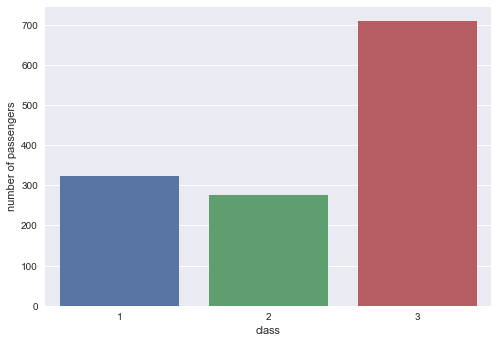

In [255]:
class_counts = titanic_frame.groupby("pclass").size()

fig, ax = plt.subplots(1,1)
sns.barplot(x=class_counts.index.tolist(), y=class_counts.tolist(), ax = ax)
ax.set(xlabel="class", ylabel="number of passengers")
plt.show()

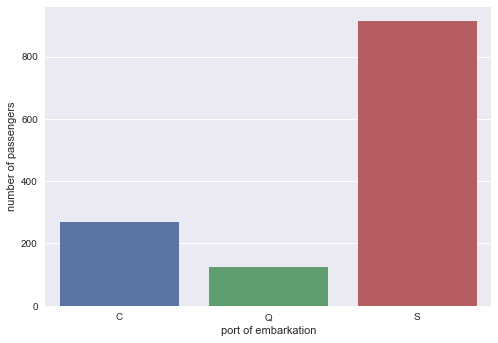

In [256]:
embarked_counts = titanic_frame.groupby("embarked").size()
                
fig, ax = plt.subplots(1,1)
sns.barplot(x=embarked_counts.index.tolist(), y=embarked_counts.tolist(), ax = ax)
ax.set(xlabel="port of embarkation", ylabel="number of passengers")
plt.show()

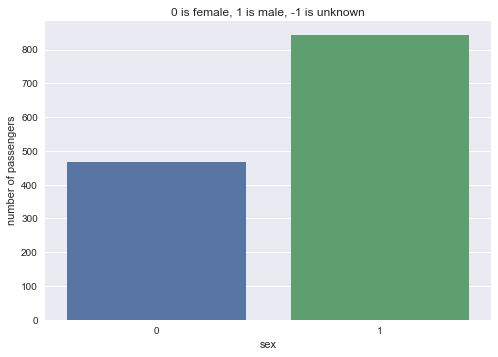

In [257]:
sex_counts = titanic_frame.groupby("sex").size()
                
fig, ax = plt.subplots(1, 1)
sns.barplot(x=sex_counts.index.tolist(), y=sex_counts.tolist(), ax = ax)
ax.set(xlabel="sex", ylabel="number of passengers", title="0 is female, 1 is male, -1 is unknown")
plt.show()

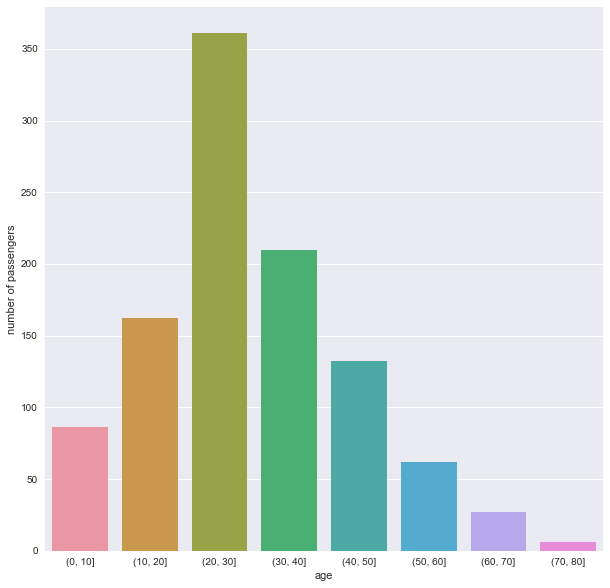

In [258]:
ages = titanic_frame["age"]
known_ages = ages[ages >= 0]
binned_ages = pd.cut(known_ages, range(0, int(known_ages.max()) + 1, 10))
binned_counts = binned_ages.groupby(binned_ages).count()


fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.barplot(x=[str(interval) for interval in binned_counts.index], y=binned_counts.values, ax = ax)
ax.set(xlabel="age", ylabel="number of passengers")
plt.show()

# 3. pie chart for cabin floor

In [259]:
# the "cabin" row stores a cabin given by a letter for the floor and a number
# there are quite a few entries with "nan"
# we count the cabins by their first letter
# in a later step we throw away all cabins with the letter n, so we need to assert that they are truly all "nan"

floor_counts = {}
for cabin in titanic_frame["cabin"]:
    cabin_letter = str(cabin)[0]
    if cabin_letter == "n":
        assert(cabin == "nan")
        
    if cabin_letter not in floor_counts:
        floor_counts[cabin_letter] = 0
    
    floor_counts[cabin_letter] += 1
    
nans = floor_counts["n"]
del floor_counts["n"]

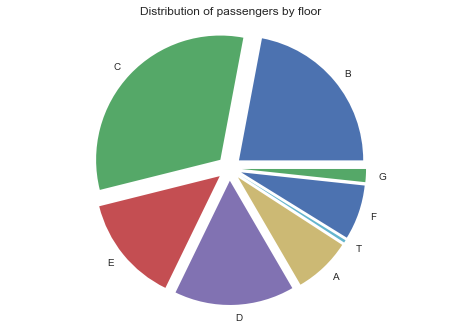

In [260]:
fig, ax = plt.subplots(1,1)

labels = list(floor_counts.keys())
values = list(floor_counts.values())
explode = (0.1,)*len(labels)
ax.pie(values, labels=labels, explode=explode, startangle=0)
ax.axis("equal")
ax.set(title="Distribution of passengers by floor")

plt.show()

# 4. survivors by class and sex

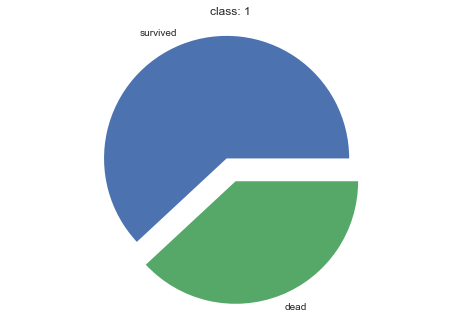

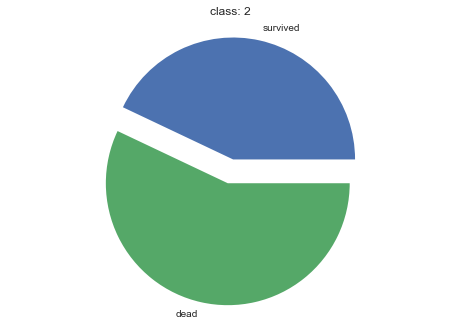

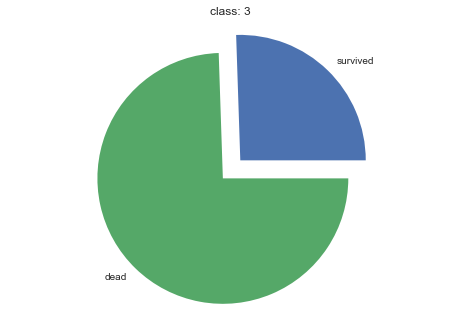

In [261]:
classes=[1,2,3]

for c in classes:
    survivors = titanic_frame.query("pclass=={} and survived==True".format(c)).shape[0]
    deaths = titanic_frame.query("pclass=={} and survived==False".format(c)).shape[0]
    total = survivors + deaths
    
    survivors /= total
    deaths /= total
    
    fig, ax = plt.subplots(1,1)

    labels = ["survived", "dead"]
    explode = (0.1,)*len(labels)
    ax.pie([survivors, deaths], labels=labels, explode=explode, startangle=0)
    ax.axis("equal")
    ax.set(title="class: "+str(c))
    
plt.show()


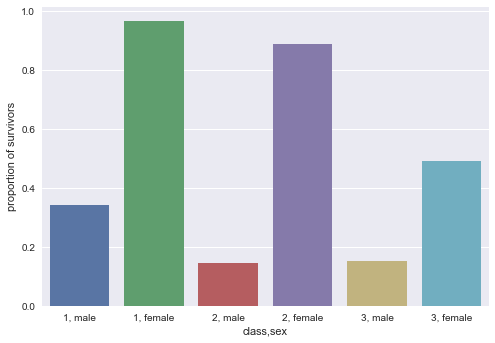

In [262]:
classes=[1,2,3]
sexes=[1, 0]

counts=[]
labels=[]

for c in classes:
    for s in sexes:
        survivors = titanic_frame.query("pclass=={} and sex=={} and survived==True".format(c, s)).shape[0]
        
        deaths = titanic_frame.query("pclass=={} and sex=={} and survived==False".format(c, s)).shape[0]
        
        total = survivors + deaths
    
        survivors /= total
        
        counts.append(survivors)
        sex = "male" if s==1 else "female"
        labels.append(str(c)+", "+sex)
        

fig, ax = plt.subplots(1,1)
sns.barplot(x=labels, y=counts, ax = ax)
ax.set(xlabel="class,sex", ylabel="proportion of survivors")
plt.show()

# 5. dataframe for survivors by age, class and sex

I'm leaving out entries where the age is not known

In [263]:
age_frame =titanic_frame[titanic_frame["age"]!=-1]
number = age_frame.shape[0]

In [264]:
# to partition the age, I'm using a cumulative distribution function
cdf = []

for i in range(100):
    cdf.append(sum(age_frame["age"]<=i)/number)

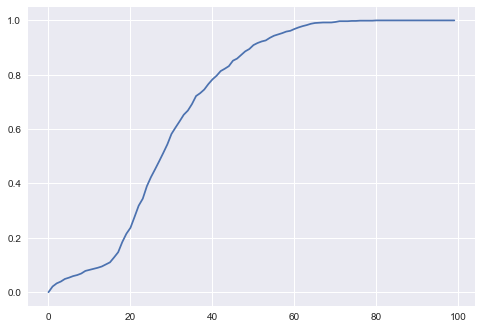

In [265]:
plt.plot(cdf)

In [266]:
# where is it equal to 0.5 ?
for i in range(100):
    if cdf[i]>0.5:
        partition=i
        break

In [267]:
partition

28

### The median of age is 28

In [268]:
lower_age = age_frame[age_frame["age"] < partition]
upper_age = age_frame[age_frame["age"] >= partition]

In [269]:
# going through the lower and upper age ranges and querying for survivors based on class and sex
def analyze(frame):
    classes=[1,2,3]
    sexes=[1, 0]

    data={}
    for c in classes:
        for s in sexes:
            survivors = frame.query("pclass=={} and sex=={} and survived==True".format(c,s)).shape[0]
            deaths = frame.query("pclass=={} and sex=={} and survived==0".format(c, s)).shape[0]
            total = survivors + deaths

            survivors /= total

            if c not in data:
                data[c]={}
                
            sex = "male" if s==1 else "female"

            data[c][sex]=survivors
    return data
            
lower_age_data=analyze(lower_age)
upper_age_data= analyze(upper_age)

In [270]:
joined = {"younger":lower_age_data, "older":upper_age_data}

this dictionary needs to be converted for pandas

pandas can parse dicts to multi-index frames, but only if the dicts have this layout:

(key1, key2, ...) : value

In [271]:
multiindex_dict = {(key1, key2, key3):val3 for key1, val1 in joined.items()
                   for key2, val2 in val1.items()
                   for key3, val3 in val2.items()
                  }


In [272]:
multiindex_dict

{('older', 1, 'female'): 0.967741935483871,
 ('older', 1, 'male'): 0.3089430894308943,
 ('older', 2, 'female'): 0.8846153846153846,
 ('older', 2, 'male'): 0.07777777777777778,
 ('older', 3, 'female'): 0.34782608695652173,
 ('older', 3, 'male'): 0.13043478260869565,
 ('younger', 1, 'female'): 0.95,
 ('younger', 1, 'male'): 0.5357142857142857,
 ('younger', 2, 'female'): 0.9019607843137255,
 ('younger', 2, 'male'): 0.23529411764705882,
 ('younger', 3, 'female'): 0.5283018867924528,
 ('younger', 3, 'male'): 0.1943127962085308}

In [273]:
joined_frame = pd.DataFrame(multiindex_dict, index=[0])

In [274]:
joined_frame

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="6" halign="left">older</th>
      <th colspan="6" halign="left">younger</th>
    </tr>
    <tr>
      <th></th>
      <th colspan="2" halign="left">1</th>
      <th colspan="2" halign="left">2</th>
      <th colspan="2" halign="left">3</th>
      <th colspan="2" halign="left">1</th>
      <th colspan="2" halign="left">2</th>
      <th colspan="2" halign="left">3</th>
    </tr>
    <tr>
      <th></th>
      <th>female</th>
      <th>male</th>
      <th>female</th>
      <th>male</th>
      <th>female</th>
      <th>male</th>
      <th>female</th>
      <th>male</th>
      <th>female</th>
      <th>male</th>
      <th>female</th>
      <th>male</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.967742</td>
      <td>0.308943</td>
      <td>0.884615</td>
      <td>0.077778</td>
      <td>0.347826</td>
      <td>0.130435</td>
      <td>0.95</td>
      <td>0.535714</td>
      <td>0.901961</td>
      <td>0.235294</td>
      <td>0.528302</td>
      <td>0.194313</td>
    </tr>
  </tbody>
</table>
</div>